<a id='top'></a>

## User Engagement Analysis of Tellco Telecommunications

#### Tables of Content

<html>
    <ul>
        <li><a href='#intro'>Introduction</a></li>
        <li><a href='#obj'>Objective</a></li>
        <li><a href= '#research'/>Research Questions<a/></li>
              <br/>
            <ul>
             <li><a href='#fe'>Feature Engineering</a></li>
             </ul>
            <ol>
            <li><a href='#r1'>Research Question 1</a></li>
             <li><a href='#r2'>Research Question 2</a></li>
             <li><a href='#r3'>Research Question 3</a></li>
            </ol>
        <br/>
        <li><a href= '#ana'>Analysis<a/></li>
        <li><a href= '#go'>General Observation<a/></li>
        <li><a href= '#rc'>Recommendation & Conclusions<a/></li>
        <li><a href= '#lim'>Limitations<a/></li>
        <li><a href= '#ref'>Referecnes<a/></li>
    </ul>
</html>

<a id= 'intro'> </a>

#### Introduction

In telecommunication , tracking the user activities on the database sessions is a good starting point to appreciate the user engagement for the overall applications and per application as well.

If we can determine the level of engagement of a random user for any application, then it could help the technical teams of the business to know where to concentrate network resources for different clusters of customers based on the engagement scores 

<a id='obj'></a>

#### Objective

The objective of this analysis is outlised as below:
    
- Track the users' engagement using the following engagement `metrics`:

- -             Sessions frequency

- -  The duration of the session

- -  The sessions total traffic (download and upload (bytes))

> Import libraries

In [321]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import cluster

<a id='research'></a>

#### Research Questions

##### Research Question 1

- Customer Aggregation

             
 1.    Aggregate the above metrics per customer id(MSISDN)  
                     
                 i  Report the top 10 customers per engagement metric

2.      Aggregat euser total traffic per application 
                    
                 i  Report the top 10 most engaged users per application 
                   
                 ii  Plot the top 3 most used applications

##### Research Question 2

- Customer Classification

             
 1. K-Means Clustering 
 
      
        i  Normalize each engagement metric & run a k-means(k=3)
                  
            to classify customers in three groups of engagement.
                          
        ii  Compute the minimum, maximum, average & total non-normalized metrics for each cluster.                        
                          
             - Visual representaiton of result and textual interpretations
             
        iii Using ​k​-means clustering algorithm:
            
            group users in k-engagement clusters based on the engagement metrics



In [322]:
path = '../datasets/cleaned/cleanWk2_data.csv'
data = pd.read_csv(path)

In [323]:
data

,bearer_id,start,start_ms,end,end_ms,imsi,msisdn_number,imei,last_location_name,avg_rtt_dl__ms_,...,youtube_dl__bytes_,youtube_ul__bytes_,netflix_dl__bytes_,netflix_ul__bytes_,gaming_dl__bytes_,gaming_ul__bytes_,other_dl__bytes_,other_ul__bytes_,total_ul__bytes_,total_dl__bytes_
0,13114483460844900352,2019-04-04 12:01:18,770.0000,2019-04-25 14:35:31,662.00000,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,42.000000,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,3.674974e+07,3.088796e+08
1,13114483482878900224,2019-04-09 13:04:04,235.0000,2019-04-25 08:15:48,606.00000,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.000000,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,5.380039e+07,6.533850e+08
2,13114483484080500736,2019-04-09 17:42:11,1.0000,2019-04-25 11:58:13,652.00000,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,109.795706,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,2.788364e+07,2.798073e+08
3,13114483485442799616,2019-04-10 00:31:25,486.0000,2019-04-25 07:36:35,171.00000,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,109.795706,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,4.332422e+07,8.460285e+08
4,13114483499480700928,2019-04-12 20:10:23,565.0000,2019-04-25 10:40:32,954.00000,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,109.795706,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,3.854281e+07,5.691386e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7277825670196679680,2019-04-29 07:28:42,451.0000,2019-04-30 06:02:33,214.00000,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,32.000000,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,5.762885e+07,5.741753e+08
149997,7349883264234609664,2019-04-29 07:28:42,483.0000,2019-04-30 10:41:33,187.00000,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,27.000000,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,3.913508e+07,6.666488e+08
149998,13114483573367300096,2019-04-29 07:28:43,283.0000,2019-04-30 10:46:12,810.00000,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,43.000000,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,3.491222e+07,5.927864e+08
149999,13114483573367300096,2019-04-29 07:28:43,696.0000,2019-04-30 10:40:34,327.00000,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,37.000000,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,2.962610e+07,3.718959e+08


In [324]:
data.columns

Index(['bearer_id', 'start', 'start_ms', 'end', 'end_ms', 'imsi',
       'msisdn_number', 'imei', 'last_location_name', 'avg_rtt_dl__ms_',
       'avg_rtt_ul__ms_', 'avg_bearer_tp_dl__kbps_', 'avg_bearer_tp_ul__kbps_',
       'tcp_dl_retrans__vol__bytes_', 'tcp_ul_retrans__vol__bytes_',
       'dl_tp_<_50_kbps__%_', '50_kbps_<_dl_tp_<_250_kbps__%_',
       '250_kbps_<_dl_tp_<_1_mbps__%_', 'dl_tp_>_1_mbps__%_',
       'ul_tp_<_10_kbps__%_', '10_kbps_<_ul_tp_<_50_kbps__%_',
       '50_kbps_<_ul_tp_<_300_kbps__%_', 'ul_tp_>_300_kbps__%_',
       'http_dl__bytes_', 'http_ul__bytes_', 'activity_duration_dl__ms_',
       'activity_duration_ul__ms_', 'dur___ms__1', 'handset_manufacturer',
       'handset_type', 'nb_of_sec_with_125000b_<_vol_dl',
       'nb_of_sec_with_1250b_<_vol_ul_<_6250b',
       'nb_of_sec_with_31250b_<_vol_dl_<_125000b',
       'nb_of_sec_with_37500b_<_vol_ul',
       'nb_of_sec_with_6250b_<_vol_dl_<_31250b',
       'nb_of_sec_with_6250b_<_vol_ul_<_37500b',
       'nb_of

<a id='fe'></a>

#### Feature Engineering
 - For this analyis, we would be working with the following features

In [325]:
columns = ['bearer_id', 'msisdn_number',
           'http_dl__bytes_', 'http_ul__bytes_', 'activity_duration_dl__ms_',
       'activity_duration_ul__ms_', 'dur___ms__1', 
          'social_media_dl__bytes_', 'social_media_ul__bytes_',
       'google_dl__bytes_', 'google_ul__bytes_', 'email_dl__bytes_',
       'email_ul__bytes_', 'youtube_dl__bytes_', 'youtube_ul__bytes_',
       'netflix_dl__bytes_', 'netflix_ul__bytes_', 'gaming_dl__bytes_',
       'gaming_ul__bytes_', 'other_dl__bytes_', 'other_ul__bytes_',
       'total_ul__bytes_', 'total_dl__bytes_']

> Get working data

In [326]:
working_data = data[columns]

In [327]:
working_data

,bearer_id,msisdn_number,http_dl__bytes_,http_ul__bytes_,activity_duration_dl__ms_,activity_duration_ul__ms_,dur___ms__1,social_media_dl__bytes_,social_media_ul__bytes_,google_dl__bytes_,...,youtube_dl__bytes_,youtube_ul__bytes_,netflix_dl__bytes_,netflix_ul__bytes_,gaming_dl__bytes_,gaming_ul__bytes_,other_dl__bytes_,other_ul__bytes_,total_ul__bytes_,total_dl__bytes_
0,13114483460844900352,3.366496e+10,1.144710e+08,3.242301e+06,3.762400e+04,3.878700e+04,8.639995e+07,1.545765e+06,24420.00000,1.634479e+06,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,3.674974e+07,3.088796e+08
1,13114483482878900224,3.368185e+10,1.144710e+08,3.242301e+06,1.680000e+02,3.560000e+03,8.639995e+07,1.926113e+06,7165.00000,3.493924e+06,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,5.380039e+07,6.533850e+08
2,13114483484080500736,3.376063e+10,1.144710e+08,3.242301e+06,0.000000e+00,0.000000e+00,8.639995e+07,1.684053e+06,42224.00000,8.535055e+06,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,2.788364e+07,2.798073e+08
3,13114483485442799616,3.375034e+10,1.144710e+08,3.242301e+06,3.330000e+03,3.788200e+04,8.639995e+07,6.441210e+05,13372.00000,9.023734e+06,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,4.332422e+07,8.460285e+08
4,13114483499480700928,3.369980e+10,1.144710e+08,3.242301e+06,0.000000e+00,0.000000e+00,8.639995e+07,8.626000e+05,50188.00000,6.248284e+06,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,3.854281e+07,5.691386e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7277825670196679680,3.365069e+10,1.144710e+08,3.242301e+06,4.237600e+04,4.191500e+04,8.123076e+07,3.464974e+06,52091.00000,9.967603e+06,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,5.762885e+07,5.741753e+08
149997,7349883264234609664,3.366345e+10,1.144710e+08,3.242301e+06,1.726400e+04,1.675900e+04,9.797070e+07,2.344568e+06,7613.00000,2.229420e+06,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,3.913508e+07,6.666488e+08
149998,13114483573367300096,3.362189e+10,1.144710e+08,3.242301e+06,2.500300e+04,2.864000e+04,9.824953e+07,1.245845e+06,14394.00000,3.850890e+06,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,3.491222e+07,5.927864e+08
149999,13114483573367300096,3.361962e+10,1.144710e+08,3.242301e+06,1.340500e+04,3.408800e+04,9.791063e+07,8.015470e+05,21562.00000,4.189773e+06,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,2.962610e+07,3.718959e+08


In [328]:
working_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 23 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   bearer_id                  150001 non-null  object 
 1   msisdn_number              150001 non-null  float64
 2   http_dl__bytes_            150001 non-null  float64
 3   http_ul__bytes_            150001 non-null  float64
 4   activity_duration_dl__ms_  150001 non-null  float64
 5   activity_duration_ul__ms_  150001 non-null  float64
 6   dur___ms__1                150001 non-null  float64
 7   social_media_dl__bytes_    150001 non-null  float64
 8   social_media_ul__bytes_    150001 non-null  float64
 9   google_dl__bytes_          150001 non-null  float64
 10  google_ul__bytes_          150001 non-null  float64
 11  email_dl__bytes_           150001 non-null  float64
 12  email_ul__bytes_           150001 non-null  float64
 13  youtube_dl__bytes_         15

<a id="r1"></a>
#### Research Question 1


`metrics`:

- -             Sessions frequency

- -  The duration of the session

- -  The sessions total traffic (download and upload (bytes))

- Customer Aggregation

             
 1.    Aggregate the above metrics per customer id(MSISDN)  
                     
                 i  Report the top 10 customers per engagement metric

2.      Aggregat user total traffic per application 
                    
                 i  Report the top 10 most engaged users per application 
                   
                 ii  Plot the top 3 most used applications

#### A

> Report the top 10 customers per engagement metric

We would start by inspecting the msisdn column

In [329]:
working_data.msisdn_number.value_counts()

3.362632e+10    1084
3.361489e+10      17
3.362578e+10      17
3.365973e+10      16
3.376054e+10      15
                ... 
3.366162e+10       1
3.365868e+10       1
3.366778e+10       1
3.361812e+10       1
3.362668e+10       1
Name: msisdn_number, Length: 106856, dtype: int64

In [330]:
working_data.msisdn_number.isnull().any()

False

In [331]:
"" in working_data.msisdn_number

False

> convert msisdn number to string datatype

In [332]:
 working_data = working_data.astype({'msisdn_number':'str'})

In [333]:
working_data.dtypes

bearer_id                     object
msisdn_number                 object
http_dl__bytes_              float64
http_ul__bytes_              float64
activity_duration_dl__ms_    float64
activity_duration_ul__ms_    float64
dur___ms__1                  float64
social_media_dl__bytes_      float64
social_media_ul__bytes_      float64
google_dl__bytes_            float64
google_ul__bytes_            float64
email_dl__bytes_             float64
email_ul__bytes_             float64
youtube_dl__bytes_           float64
youtube_ul__bytes_           float64
netflix_dl__bytes_           float64
netflix_ul__bytes_           float64
gaming_dl__bytes_            float64
gaming_ul__bytes_            float64
other_dl__bytes_             float64
other_ul__bytes_             float64
total_ul__bytes_             float64
total_dl__bytes_             float64
dtype: object

> group each metric by users msisdn number

1. Group by `session frequency`

In [334]:
sess_fre = working_data.groupby('msisdn_number')['bearer_id'].count().reset_index(name='session_fre').sort_values('session_fre', ascending = False)

In [335]:
sess_fre.head()

,msisdn_number,session_fre
13527,33626320676.0,1084
6438,33614892860.0,17
13181,33625779332.0,17
37053,33659725664.0,16
92925,33760536639.0,15


2. Grouo by `session duration`

In [336]:
sess_dur = working_data.groupby('msisdn_number')['dur___ms__1'].sum().reset_index(name='session_dur').sort_values('session_dur', ascending = False)

In [337]:
sess_dur

,msisdn_number,session_dur
13527,33626320676.0,7.100917e+10
37053,33659725664.0,3.625663e+09
76364,33675877202.0,2.961686e+09
57242,33664712899.0,2.927790e+09
60339,33665530316.0,2.684571e+09
...,...,...
24742,33650431620.0,7.267018e+06
85147,33698390293.0,7.258080e+06
35288,33659328207.0,7.189000e+06
60768,33665660120.0,7.146574e+06


> We have to convert the session duration to hours, so our interpreations can be more clear after analysis

In [338]:
sess_dur.session_dur=sess_dur.session_dur.apply(lambda x: int(x/(1000*60*60)%24))

In [339]:
sess_dur.rename(columns={'session_dur':'session_dur_hours'}, inplace=True)

In [340]:
sess_dur

,msisdn_number,session_dur_hours
13527,33626320676.0,20
37053,33659725664.0,23
76364,33675877202.0,6
57242,33664712899.0,21
60339,33665530316.0,1
...,...,...
24742,33650431620.0,2
85147,33698390293.0,2
35288,33659328207.0,1
60768,33665660120.0,1


3. Group by session `total traffic`

In [341]:
working_data['total_traffic_bytes'] = working_data.total_dl__bytes_ + working_data.total_ul__bytes_

In [342]:
working_data.total_traffic_bytes

0         3.456294e+08
1         7.071854e+08
2         3.076910e+08
3         8.893527e+08
4         6.076814e+08
              ...     
149996    6.318041e+08
149997    7.057839e+08
149998    6.276986e+08
149999    4.015220e+08
150000    4.957646e+08
Name: total_traffic_bytes, Length: 150001, dtype: float64

In [343]:
sess_trfc = working_data.groupby('msisdn_number')['total_traffic_bytes'].sum().reset_index(name='session_trfc').sort_values('session_trfc', ascending = False)

In [344]:
sess_trfc

,msisdn_number,session_trfc
13527,33626320676.0,5.397159e+11
6438,33614892860.0,8.846226e+09
92925,33760536639.0,8.514774e+09
13181,33625779332.0,8.499621e+09
76364,33675877202.0,7.891111e+09
...,...,...
76162,33675475328.0,3.802236e+07
104771,33782507973.0,3.792924e+07
63658,33666684512.0,3.399962e+07
43678,33661319633.0,3.357584e+07


> For the purpose of our analytics, we would convert bytes figure of total_traffic to megabytes

In [345]:
sess_trfc.session_trfc=sess_trfc.session_trfc.apply(lambda x : round((x/1024)/1024,4))

In [346]:
sess_trfc

,msisdn_number,session_trfc
13527,33626320676.0,514713.1696
6438,33614892860.0,8436.4190
92925,33760536639.0,8120.3212
13181,33625779332.0,8105.8700
76364,33675877202.0,7525.5495
...,...,...
76162,33675475328.0,36.2609
104771,33782507973.0,36.1721
63658,33666684512.0,32.4246
43678,33661319633.0,32.0204


> merge all metrics to a single metrics table

In [347]:
agg_metrics = sess_dur.merge(sess_fre,on='msisdn_number').merge(sess_trfc, on='msisdn_number')

In [348]:
agg_metrics

,msisdn_number,session_dur_hours,session_fre,session_trfc
0,33626320676.0,20,1084,514713.1696
1,33659725664.0,23,16,7348.8834
2,33675877202.0,6,15,7525.5495
3,33664712899.0,21,11,6553.6673
4,33665530316.0,1,10,4656.6544
...,...,...,...,...
106851,33650431620.0,2,1,199.2166
106852,33698390293.0,2,1,797.9008
106853,33659328207.0,1,1,266.8424
106854,33665660120.0,1,1,647.0846


> from the metrics aggregation table, we can perform various analysis

>> Top 10 customers per engagement metric

- Top 10 customers per sessions frequency 

In [349]:
top10_fre = agg_metrics.sort_values(by='session_fre', ascending=False).head(10)

In [350]:
top10_fre

,msisdn_number,session_dur_hours,session_fre,session_trfc
0,33626320676.0,20,1084,514713.1696
14,33625779332.0,0,17,8105.8700
9,33614892860.0,14,17,8436.4190
1,33659725664.0,23,16,7348.8834
2,33675877202.0,6,15,7525.5495
8,33760536639.0,21,15,8120.3212
23,33667163239.0,0,13,5358.1181
40,33604515716.0,18,12,5233.6266
29,33786323068.0,12,12,5361.7778
28,33603127838.0,13,12,4745.6694


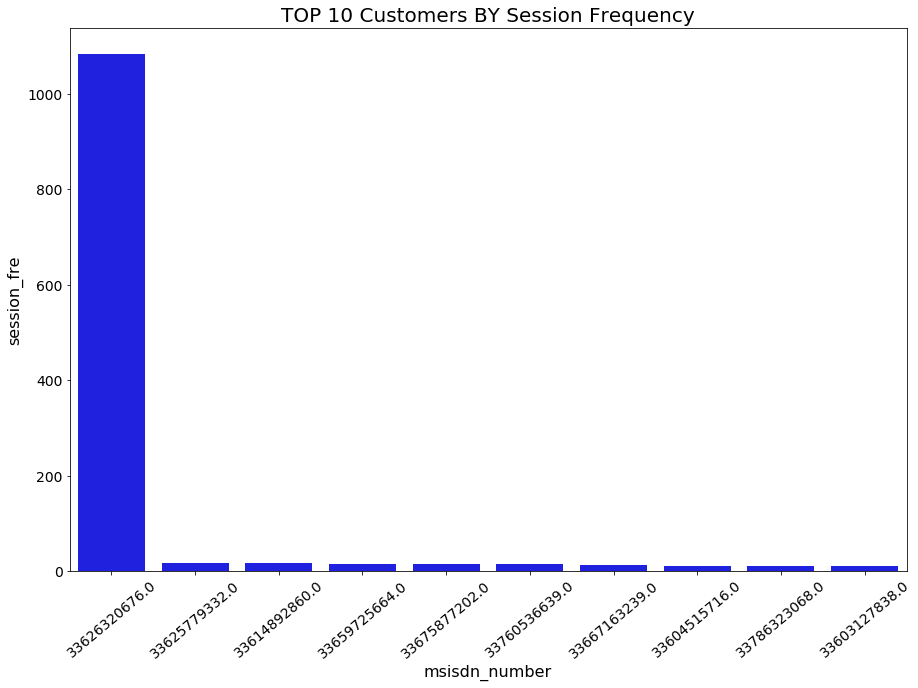

In [351]:
plt.subplots(figsize=(15,10))
plt.xticks(rotation=40, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('MSISDN Number', fontsize=16)
plt.ylabel('Session Frequency', fontsize=16)
plt.title('TOP 10 Customers BY Session Frequency', fontsize=20)
sns.barplot(x='msisdn_number', y= 'session_fre', data=top10_fre, color='b', order=top10_fre.msisdn_number.values.tolist())
# save chart
plt.savefig(fname='visuals/user_engagement/top10CustSessionFreq.png', format='png')
plt.show()

> The customer with MSISDN number `33626320676` has an outsized (outlier) positive difference from the average session frequency of the top ten.

- Top 10 customers per session deuration 

In [352]:
top10_dur = agg_metrics.sort_values(by='session_dur_hours', ascending=False).head(10)

In [353]:
top10_dur

,msisdn_number,session_dur_hours,session_fre,session_trfc
71658,33665394981.0,23,1,438.4697
70631,33753440844.0,23,1,689.2106
70619,33631271185.0,23,1,593.7067
70620,33671140787.0,23,1,550.2475
70621,33621487916.0,23,1,839.3517
70622,33764573175.0,23,1,730.5978
70623,33664939360.0,23,1,212.5659
70624,33666712989.0,23,1,666.3949
70625,33662084922.0,23,1,419.2860
70626,33650549242.0,23,1,661.0856


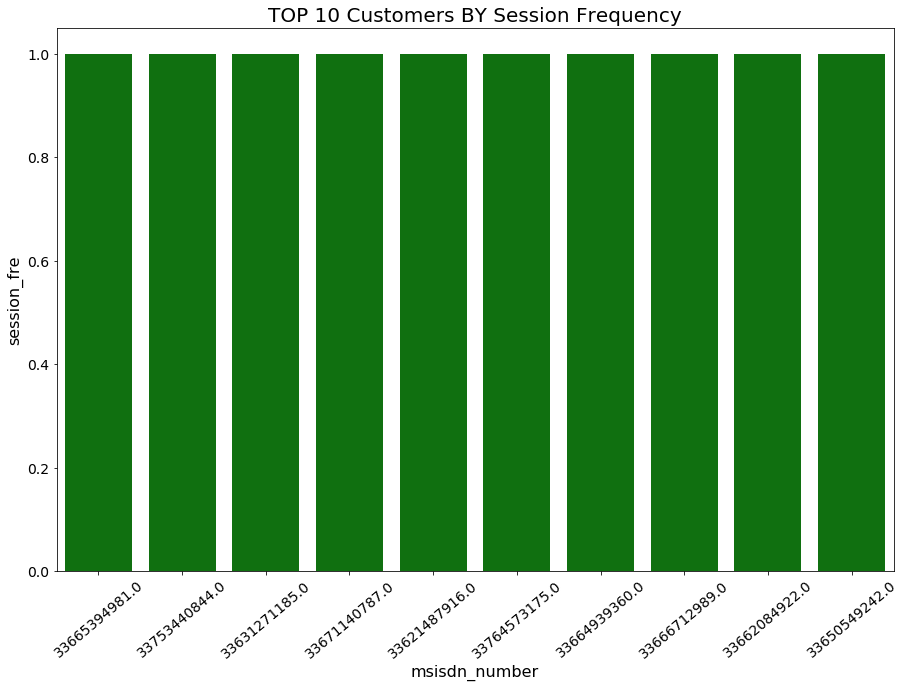

In [354]:
plt.subplots(figsize=(15,10))
plt.xticks(rotation=40, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('MSISDN Number', fontsize=16)
plt.ylabel('Session Frequency', fontsize=16)
plt.title('TOP 10 Customers BY Session Frequency', fontsize=20)
sns.barplot(x='msisdn_number', y= 'session_fre', data=top10_dur, color='g', order=top10_dur.msisdn_number.values.tolist())
# save chart
plt.savefig(fname='visuals/user_engagement/top10CustSessionFreq.png', format='png')
plt.show()

> All top 10 customers by session duration in hours have the spent approximately the same number of hours on Data Sessions

> Howveer, further investigation reveals that we actaully have over twn customer s who have spent 23 hours on xDR sessions

> A value counts of hours in session durations reveals this

In [355]:
agg_metrics.session_dur_hours.value_counts()

23    18537
0      7126
3      5133
4      4876
5      4366
7      4277
8      4238
2      4190
6      4066
9      3968
1      3794
10     3704
22     3603
11     3587
13     3459
12     3300
16     3296
15     3288
14     3284
21     3238
17     3119
18     2881
20     2859
19     2667
Name: session_dur_hours, dtype: int64

> Lets visualize this

In [356]:
sess_dur_counts = agg_metrics.session_dur_hours.value_counts().sort_values(ascending=False).reset_index(name='customer counts')

In [357]:
sess_dur_counts.rename(columns={"index":'hours'}, inplace=True)

In [358]:
sess_dur_counts

,hours,customer counts
0,23,18537
1,0,7126
2,3,5133
3,4,4876
4,5,4366
5,7,4277
6,8,4238
7,2,4190
8,6,4066
9,9,3968


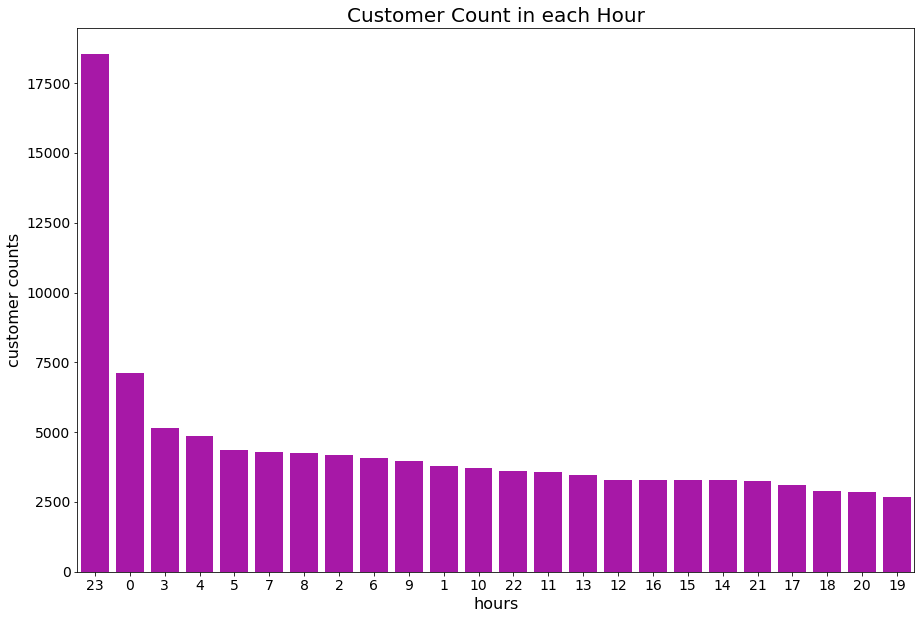

In [359]:
plt.subplots(figsize=(15,10))
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Hours', fontsize=16)
plt.ylabel('Customer Count', fontsize=16)
plt.title('Customer Count in each Hour', fontsize=20)
sns.barplot(x='hours', y= 'customer counts', data=sess_dur_counts, color='m', order=sess_dur_counts.hours.values.tolist())
# save chart
plt.savefig(fname='visuals/user_engagement/SessionDurCounts.png', format='png')
plt.show()

> From the above we can see that our top customers by session duration are actrually `18,537 customers`

> This is quite significant as it is indicative growth in patronage

- Top 10 customers per sessions traffic 

In [360]:
top10_trfc = agg_metrics.sort_values(by='session_trfc', ascending=False).head(10)

In [361]:
top10_trfc

,msisdn_number,session_dur_hours,session_fre,session_trfc
0,33626320676.0,20,1084,514713.1696
9,33614892860.0,14,17,8436.4190
8,33760536639.0,21,15,8120.3212
14,33625779332.0,0,17,8105.8700
2,33675877202.0,6,15,7525.5495
1,33659725664.0,23,16,7348.8834
11,33666464084.0,6,11,6969.9296
18,33760413819.0,8,12,6801.9586
3,33664712899.0,21,11,6553.6673
57,33698792269.0,12,11,6237.8875


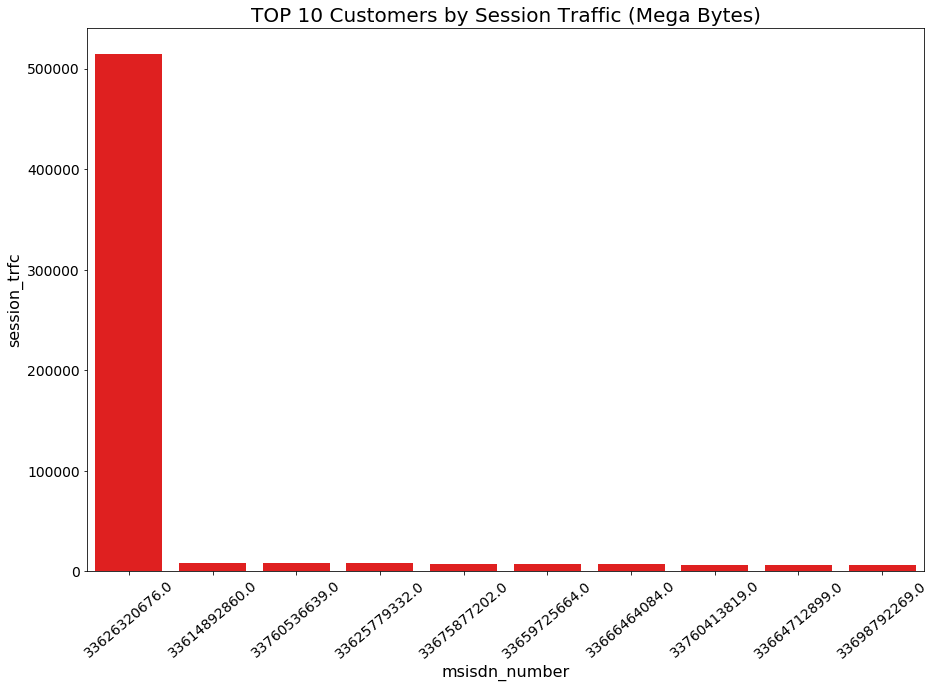

In [362]:
plt.subplots(figsize=(15,10))
plt.xticks(rotation=40, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('MSISDN Number', fontsize=16)
plt.ylabel('Session Traffic', fontsize=16)
plt.title('TOP 10 Customers by Session Traffic (Mega Bytes)', fontsize=20)
sns.barplot(x='msisdn_number', y= 'session_trfc', data=top10_trfc, color='r', order=top10_trfc.msisdn_number.values.tolist())
# save chart
plt.savefig(fname='visuals/user_engagement/top10CustSessTrfc.png', format='png')
plt.show()

> Just like in the case of session frequency, the customer with MSISDN number `33626320676` has an outsized (outlier) positive difference from the average session traffic of the top ten.

> We can take a step further in trying to understand why this is the case by calculating the correaltion between session frequency and session traffic

In [363]:
trfc_frq = agg_metrics[['session_fre','session_trfc']]
trfc_frq

,session_fre,session_trfc
0,1084,514713.1696
1,16,7348.8834
2,15,7525.5495
3,11,6553.6673
4,10,4656.6544
...,...,...
106851,1,199.2166
106852,1,797.9008
106853,1,266.8424
106854,1,647.0846


In [364]:
trfc_frq_corr = trfc_frq.corr()
trfc_frq_corr.iloc[1,0]

0.985798441435972

> From the above, we can see that there is a `strong positive correlaion between session frequency and session traffic`

> Let's visualize this

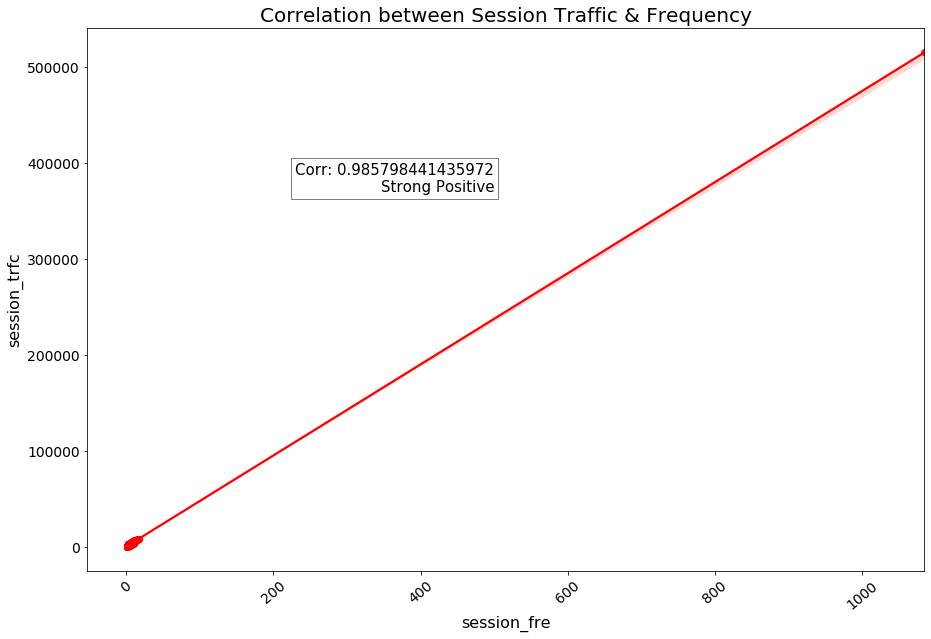

In [365]:
plt.subplots(figsize=(15,10))
plt.xticks(rotation=40, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Session Frequency', fontsize=16)
plt.ylabel('Session Traffic', fontsize=16)
plt.title('Correlation between Session Traffic & Frequency', fontsize=20)
sns.regplot(data=trfc_frq, y='session_trfc', x='session_fre', scatter=True, color='r')
plt.text(500, 400000, s= f'Corr: {trfc_frq_corr.iloc[1,0]}\nStrong Positive', fontsize=15,
         horizontalalignment='right',
         bbox=dict(facecolor='w', alpha=0.5),
         verticalalignment='top')
plt.savefig(fname='visuals/user_engagement/sessFrqTrfcCorr.png', format='png')
plt.show()

####  Let's plot a correlation matrix for all metrics

In [366]:
agg_metrics_corr = agg_metrics.corr()

In [367]:
agg_metrics_corr

,session_dur_hours,session_fre,session_trfc
session_dur_hours,1.000000,0.013976,0.013744
session_fre,0.013976,1.000000,0.985798
session_trfc,0.013744,0.985798,1.000000


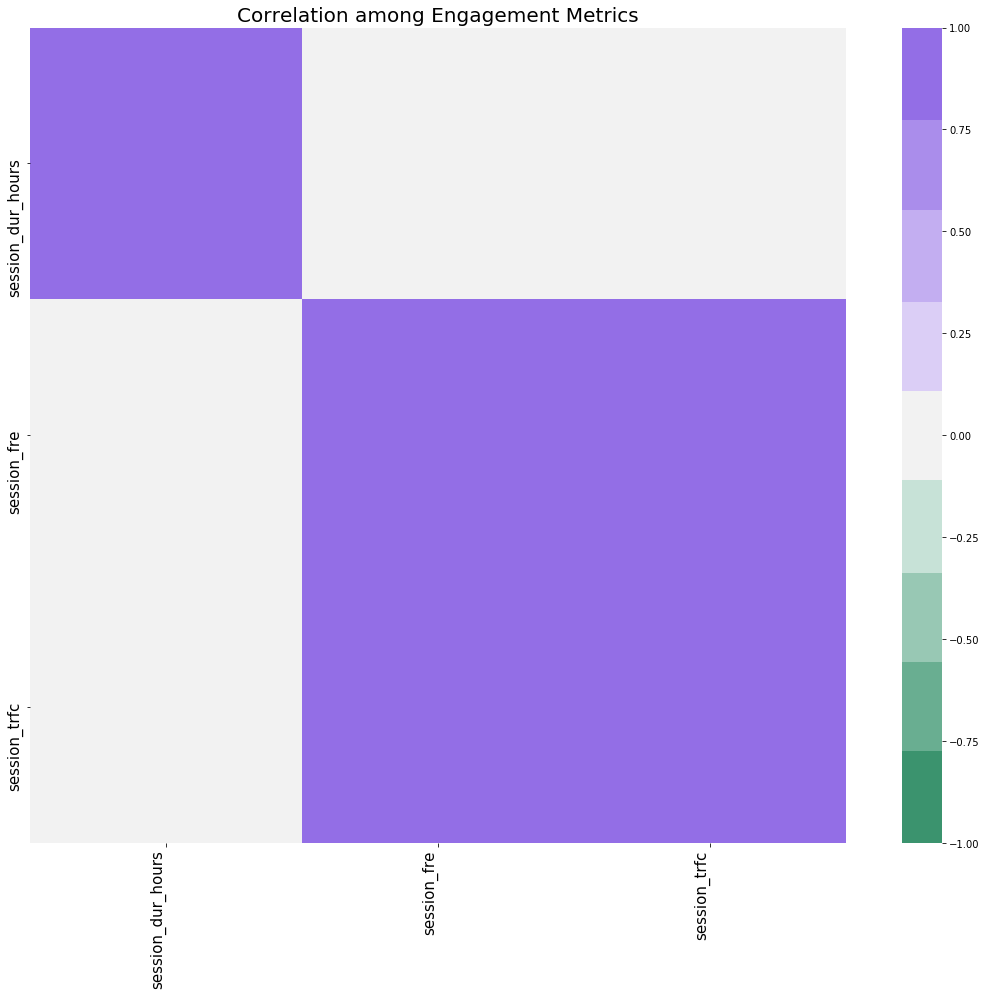

In [368]:
plt.subplots(figsize=(20, 15))
plt.title('Correlation among Engagement Metrics', fontsize=20)
ax = sns.heatmap(
    agg_metrics_corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(150, 275, s=80, l=55, n=9),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig(format='png', fname='visuals/user_engagement/aggMatrixCorr.png')
plt.show()

#### Interpretation

> 1. There is very little or no correlation between session duration (hours) and any of the other metrics

> 2. There is  a strong positive correlation between session frequency and session traffic

>> This means that an increase in session frequency is highly likely to lead to increase in session traffic

#### B

> Report the top 10 most engaged users per application 
                   
> Plot the top 3 most used applications

In [369]:
working_data

,bearer_id,msisdn_number,http_dl__bytes_,http_ul__bytes_,activity_duration_dl__ms_,activity_duration_ul__ms_,dur___ms__1,social_media_dl__bytes_,social_media_ul__bytes_,google_dl__bytes_,...,youtube_ul__bytes_,netflix_dl__bytes_,netflix_ul__bytes_,gaming_dl__bytes_,gaming_ul__bytes_,other_dl__bytes_,other_ul__bytes_,total_ul__bytes_,total_dl__bytes_,total_traffic_bytes
0,13114483460844900352,33664962239.0,1.144710e+08,3.242301e+06,3.762400e+04,3.878700e+04,8.639995e+07,1.545765e+06,24420.00000,1.634479e+06,...,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,3.674974e+07,3.088796e+08,3.456294e+08
1,13114483482878900224,33681854413.0,1.144710e+08,3.242301e+06,1.680000e+02,3.560000e+03,8.639995e+07,1.926113e+06,7165.00000,3.493924e+06,...,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,5.380039e+07,6.533850e+08,7.071854e+08
2,13114483484080500736,33760627129.0,1.144710e+08,3.242301e+06,0.000000e+00,0.000000e+00,8.639995e+07,1.684053e+06,42224.00000,8.535055e+06,...,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,2.788364e+07,2.798073e+08,3.076910e+08
3,13114483485442799616,33750343200.0,1.144710e+08,3.242301e+06,3.330000e+03,3.788200e+04,8.639995e+07,6.441210e+05,13372.00000,9.023734e+06,...,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,4.332422e+07,8.460285e+08,8.893527e+08
4,13114483499480700928,33699795932.0,1.144710e+08,3.242301e+06,0.000000e+00,0.000000e+00,8.639995e+07,8.626000e+05,50188.00000,6.248284e+06,...,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,3.854281e+07,5.691386e+08,6.076814e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7277825670196679680,33650688697.0,1.144710e+08,3.242301e+06,4.237600e+04,4.191500e+04,8.123076e+07,3.464974e+06,52091.00000,9.967603e+06,...,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,5.762885e+07,5.741753e+08,6.318041e+08
149997,7349883264234609664,33663449963.0,1.144710e+08,3.242301e+06,1.726400e+04,1.675900e+04,9.797070e+07,2.344568e+06,7613.00000,2.229420e+06,...,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,3.913508e+07,6.666488e+08,7.057839e+08
149998,13114483573367300096,33621890103.0,1.144710e+08,3.242301e+06,2.500300e+04,2.864000e+04,9.824953e+07,1.245845e+06,14394.00000,3.850890e+06,...,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,3.491222e+07,5.927864e+08,6.276986e+08
149999,13114483573367300096,33619622058.0,1.144710e+08,3.242301e+06,1.340500e+04,3.408800e+04,9.791063e+07,8.015470e+05,21562.00000,4.189773e+06,...,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,2.962610e+07,3.718959e+08,4.015220e+08


In [370]:
working_data.columns

Index(['bearer_id', 'msisdn_number', 'http_dl__bytes_', 'http_ul__bytes_',
       'activity_duration_dl__ms_', 'activity_duration_ul__ms_', 'dur___ms__1',
       'social_media_dl__bytes_', 'social_media_ul__bytes_',
       'google_dl__bytes_', 'google_ul__bytes_', 'email_dl__bytes_',
       'email_ul__bytes_', 'youtube_dl__bytes_', 'youtube_ul__bytes_',
       'netflix_dl__bytes_', 'netflix_ul__bytes_', 'gaming_dl__bytes_',
       'gaming_ul__bytes_', 'other_dl__bytes_', 'other_ul__bytes_',
       'total_ul__bytes_', 'total_dl__bytes_', 'total_traffic_bytes'],
      dtype='object')

Report the top 10 most engaged users per application 

In [371]:
apps = pd.DataFrame()

`NB`: I would be converting bytes to megabytes

In [372]:
apps['bearer_id'] = working_data['bearer_id']
apps['msisdn_number'] = working_data['msisdn_number']
apps['social_media(mb)'] = round(((working_data.social_media_dl__bytes_ + working_data.social_media_ul__bytes_)/1024)/1024,4)
apps['google(mb)'] = round(((working_data.google_dl__bytes_ + working_data.google_ul__bytes_)/1024)/1024,4)
apps['email(mb)'] = round(((working_data.email_dl__bytes_ + working_data.email_ul__bytes_)/1024)/1024,4)
apps['youtube(mb)'] = round(((working_data.youtube_dl__bytes_ + working_data.youtube_ul__bytes_)/1024)/1024,4)
apps['netflix(mb)'] = round(((working_data.netflix_dl__bytes_ + working_data.netflix_ul__bytes_)/1024)/1024,4)
apps['gaming(mb)'] = round(((working_data.gaming_dl__bytes_ + working_data.gaming_ul__bytes_)/1024)/1024,4)
apps['other(mb)'] = round(((working_data.other_dl__bytes_ + working_data.other_ul__bytes_)/1024)/1024,4) 
apps['total_traffic(mb)'] = round(((working_data.total_traffic_bytes)/1024)/1024,4)
# convert duration from millisecond to hour
apps['duration (hrs)'] = round(((working_data.dur___ms__1)/1024)/1024,4)

In [373]:
apps

,bearer_id,msisdn_number,social_media(mb),google(mb),email(mb),youtube(mb),netflix(mb),gaming(mb),other(mb),total_traffic(mb),duration (hrs)
0,13114483460844900352,33664962239.0,1.4974,2.7713,3.5298,17.5056,17.0280,278.8796,172.1943,329.6179,82.3974
1,13114483482878900224,33681854413.0,1.8437,4.2096,0.8940,37.5358,33.9179,581.6658,516.8527,674.4245,82.3974
2,13114483484080500736,33760627129.0,1.6463,9.7552,3.2073,32.8305,22.6509,219.3263,395.6874,293.4370,82.3974
3,13114483485442799616,33750343200.0,0.6270,11.2646,1.9750,34.8423,14.3934,772.8461,726.5446,848.1529,82.3974
4,13114483499480700928,33699795932.0,0.8705,7.3899,2.0126,32.6369,16.7273,506.6271,538.4634,579.5301,82.3974
...,...,...,...,...,...,...,...,...,...,...,...
149996,7277825670196679680,33650688697.0,3.3541,12.1926,0.6589,26.6601,35.8218,510.9853,15.9759,602.5354,77.4677
149997,7349883264234609664,33663449963.0,2.2432,4.2108,2.0234,21.1387,38.7605,602.3675,681.5320,673.0880,93.4321
149998,13114483573367300096,33621890103.0,1.2019,6.2804,1.9629,23.3807,14.3334,540.6702,126.2813,598.6201,93.6981
149999,13114483573367300096,33619622058.0,0.7850,7.3979,2.7188,16.3293,15.7307,338.6178,778.3127,382.9212,93.3749


> Social Media

In [374]:
social_media_users = apps.groupby('msisdn_number')['social_media(mb)'].sum().reset_index(name='social_traffic')

In [375]:
social_media_users

,msisdn_number,social_traffic
0,3197020876596.0,0.6821
1,33601001722.0,2.1287
2,33601001754.0,2.5373
3,33601002511.0,3.0476
4,33601007832.0,0.2673
...,...,...
106851,33789967113.0,1.3479
106852,33789980299.0,4.0534
106853,33789996170.0,0.2863
106854,33789997247.0,0.4755


> merge aggregation metrics

In [376]:
social_media_users = social_media_users.merge(agg_metrics, on='msisdn_number').sort_values(by='social_traffic', ascending=False)

In [377]:
social_media_users.head(10)

,msisdn_number,social_traffic,session_dur_hours,session_fre,session_trfc
13527,33626320676.0,1923.7432,20,1084,514713.1696
92925,33760536639.0,37.9404,21,15,8120.3212
37053,33659725664.0,33.7715,23,16,7348.8834
6438,33614892860.0,26.9837,14,17,8436.4190
13181,33625779332.0,25.8784,0,17,8105.8700
65119,33667163239.0,23.1245,0,13,5358.1181
106139,33786323068.0,22.8642,12,12,5361.7778
70961,33669068942.0,22.6981,1,11,3725.5690
667,33603127838.0,22.0088,13,12,4745.6694
31332,33658490784.0,21.9346,17,9,2565.5164


In [378]:
top10_socialMedia_users = social_media_users.head(10)

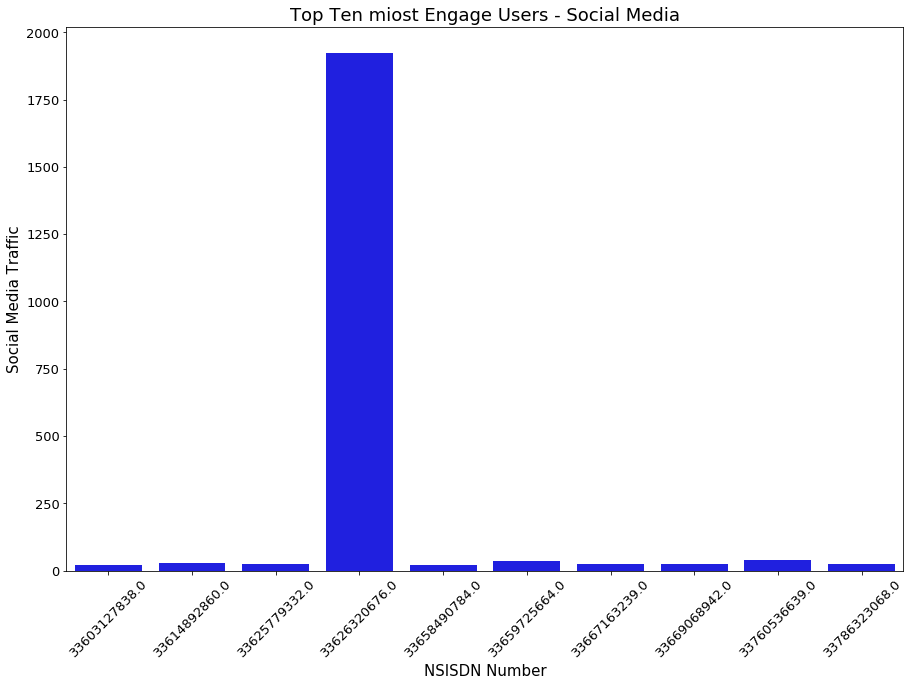

In [402]:
plt.subplots(figsize=(15,10))
sns.barplot(data=top10_socialMedia_users, x='msisdn_number', y='social_traffic', color='b')
plt.title("Top Ten miost Engage Users - Social Media", fontsize=18)
plt.xticks(fontsize=13, rotation = 45)
plt.yticks(fontsize=13)
plt.xlabel('NSISDN Number', fontsize=15)
plt.ylabel('Social Media Traffic', fontsize=15)
plt.savefig("visuals/user_engagement/topTenSocialMedia.png", format="png")
plt.show()

In [380]:
social_media_agg = pd.melt(id_vars=['msisdn_number'], value_vars=['session_dur_hours','session_fre',],
        value_name='value', var_name='metrics', frame=social_media_users.head(10))

In [381]:
social_media_agg

,msisdn_number,metrics,value
0,33626320676.0,session_dur_hours,20
1,33760536639.0,session_dur_hours,21
2,33659725664.0,session_dur_hours,23
3,33614892860.0,session_dur_hours,14
4,33625779332.0,session_dur_hours,0
5,33667163239.0,session_dur_hours,0
6,33786323068.0,session_dur_hours,12
7,33669068942.0,session_dur_hours,1
8,33603127838.0,session_dur_hours,13
9,33658490784.0,session_dur_hours,17


In [382]:
social_media_agg = social_media_agg.sort_values(by='msisdn_number')

In [383]:
social_media_agg

,msisdn_number,metrics,value
18,33603127838.0,session_fre,12
8,33603127838.0,session_dur_hours,13
13,33614892860.0,session_fre,17
3,33614892860.0,session_dur_hours,14
14,33625779332.0,session_fre,17
4,33625779332.0,session_dur_hours,0
0,33626320676.0,session_dur_hours,20
10,33626320676.0,session_fre,1084
9,33658490784.0,session_dur_hours,17
19,33658490784.0,session_fre,9


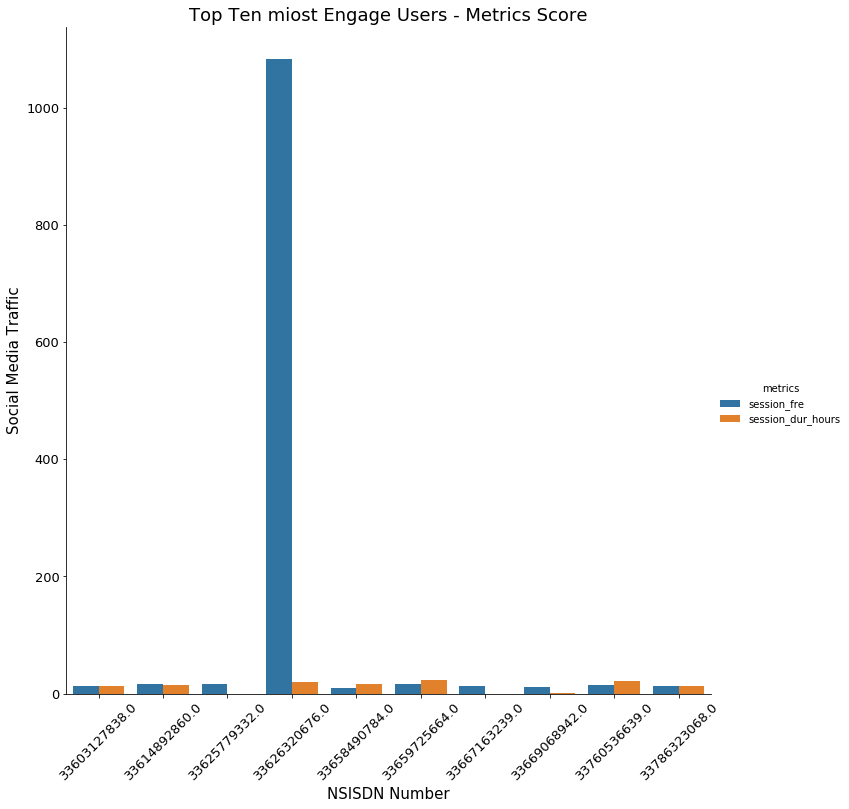

In [403]:
sns.catplot(data=social_media_agg, x='msisdn_number', y='value', hue='metrics',
    height=10, kind='bar', 
    aspect=1,)
plt.title("Top Ten miost Engage Users - Metrics Score", fontsize=18)
plt.xticks(fontsize=13, rotation = 45)
plt.yticks(fontsize=13)
plt.xlabel('NSISDN Number', fontsize=15)
plt.ylabel('Social Media Traffic', fontsize=15)
plt.savefig("visuals/user_engagement/topTenSocialMedia2.png", format="png")
plt.show()